In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import a_funciones as fn

In [2]:
cat = pd.read_csv("cat.csv", sep= ',')
num = pd.read_csv("num.csv", sep= ',')
y = pd.read_csv("y.csv", sep= ',')

In [3]:
cat=cat.drop(['Unnamed: 0'],axis=1)
num=num.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)
y=y.drop(['Unnamed: 0'],axis=1)

In [4]:
cat.head()

BusinessTravel              Department  Education EducationField  \
0      Travel_Rarely                   Sales          2  Life Sciences   
1  Travel_Frequently  Research & Development          1  Life Sciences   
2  Travel_Frequently  Research & Development          4          Other   
3         Non-Travel  Research & Development          5  Life Sciences   
4      Travel_Rarely  Research & Development          1        Medical   

   Gender  JobLevel                    JobRole MaritalStatus  JobInvolvement  \
0  Female         1  Healthcare Representative       Married               3   
1  Female         1         Research Scientist        Single               2   
2    Male         4            Sales Executive       Married               3   
3    Male         3            Human Resources       Married               2   
4    Male         1            Sales Executive        Single               3   

   PerformanceRating  EnvironmentSatisfaction  JobSatisfaction  \
0                  3                      3.0              4.0   
1                  4                      3.0              2.0   
2                  3                      2.0              2.0   
3                  3                      4.0              4.0   
4                  3                      4.0              1.0   

   WorkLifeBalance  StockOptionLevel resignationReason retirementType  
0              2.0                 0            Worked         Worked  
1              4.0                 1            Others    Resignation  
2              1.0                 3            Worked         Worked  
3              3.0                 3            Worked         Worked  
4              3.0                 2            Worked         Worked

In [5]:
num.head()

Age  DistanceFromHome  MonthlyIncome  NumCompaniesWorked  \
0   51                 6         131160                 1.0   
1   31                10          41890                 0.0   
2   32                17         193280                 1.0   
3   38                 2          83210                 3.0   
4   32                10          23420                 4.0   

   PercentSalaryHike  TotalWorkingYears  TrainingTimesLastYear  \
0                 11                  1                      6   
1                 23                  6                      3   
2                 15                  5                      2   
3                 11                 13                      5   
4                 12                  9                      2   

   YearsAtCompany  YearsSinceLastPromotion  YearsWithCurrManager  mean_time  
0               1                        0                     0       7.37  
1               5                        1                     4       7.72  
2               5                        0                     3       7.01  
3               8                        7                     5       7.19  
4               6                        0                     4       8.01

In [6]:
y.head()

Attrition
0          0
1          1
2          0
3          0
4          0

In [7]:
cat = cat.astype(str)

In [8]:
# Se transforman las variables categoricas en dummies para separar los niveles de cada una y analizar su influencia
cat = pd.get_dummies(cat)

In [9]:
cat = cat.astype(int)

In [10]:
cat

BusinessTravel_Non-Travel  BusinessTravel_Travel_Frequently  \
0                             0                                 0   
1                             0                                 1   
2                             0                                 1   
3                             1                                 0   
4                             0                                 0   
...                         ...                               ...   
4405                          0                                 0   
4406                          0                                 0   
4407                          0                                 0   
4408                          0                                 0   
4409                          0                                 0   

      BusinessTravel_Travel_Rarely  Department_Human Resources  \
0                                1                           0   
1                                0                           0   
2                                0                           0   
3                                0                           0   
4                                1                           0   
...                            ...                         ...   
4405                             1                           0   
4406                             1                           0   
4407                             1                           0   
4408                             1                           0   
4409                             1                           0   

      Department_Research & Development  Department_Sales  Education_0  \
0                                     0                 1            0   
1                                     1                 0            0   
2                                     1                 0            0   
3                                     1                 0            0   
4                                     1                 0            0   
...                                 ...               ...          ...   
4405                                  1                 0            0   
4406                                  1                 0            0   
4407                                  1                 0            0   
4408                                  0                 1            0   
4409                                  1                 0            1   

      Education_1  Education_2  Education_3  ...  StockOptionLevel_1  \
0               0            1            0  ...                   0   
1               1            0            0  ...                   1   
2               0            0            0  ...                   0   
3               0            0            0  ...                   0   
4               1            0            0  ...                   0   
...           ...          ...          ...  ...                 ...   
4405            0            0            0  ...                   1   
4406            0            0            0  ...                   0   
4407            0            1            0  ...                   0   
4408            0            1            0  ...                   1   
4409            0            0            0  ...                   0   

      StockOptionLevel_2  StockOptionLevel_3  resignationReason_Others  \
0                      0                   0                         0   
1                      0                   0                         1   
2                      0                   1                         0   
3                      0                   1                         0   
4                      1                   0                         0   
...                  ...                 ...                       ...   
4405                   0                   0                         0   
4406                   0              

In [11]:
variances = cat.var()
variances

BusinessTravel_Non-Travel            0.091288
BusinessTravel_Travel_Frequently     0.152112
BusinessTravel_Travel_Rarely         0.205383
Department_Human Resources           0.040615
Department_Research & Development    0.225712
                                       ...   
resignationReason_Stress             0.028402
resignationReason_Worked             0.124253
retirementType_Fired                 0.015625
retirementType_Resignation           0.124253
retirementType_Worked                0.135262
Length: 67, dtype: float64

In [12]:
promedio_varianzas = variances.mean()
promedio_varianzas

0.13539201448947988

In [13]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.15)
cat_fil = pd.DataFrame(selector.fit_transform(cat), columns=cat.columns[selector.get_support()])
cat2=cat_fil

In [14]:
cat2

BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
0                                    0                             1   
1                                    1                             0   
2                                    1                             0   
3                                    0                             0   
4                                    0                             1   
...                                ...                           ...   
4405                                 0                             1   
4406                                 0                             1   
4407                                 0                             1   
4408                                 0                             1   
4409                                 0                             1   

      Department_Research & Development  Department_Sales  Education_2  \
0                                     0                 1            1   
1                                     1                 0            0   
2                                     1                 0            0   
3                                     1                 0            0   
4                                     1                 0            0   
...                                 ...               ...          ...   
4405                                  1                 0            0   
4406                                  1                 0            0   
4407                                  1                 0            1   
4408                                  0                 1            1   
4409                                  1                 0            0   

      Education_3  Education_4  EducationField_Life Sciences  \
0               0            0                             1   
1               0            0                             1   
2               0            1                             0   
3               0            0                             1   
4               0            0                             0   
...           ...          ...                           ...   
4405            0            1                             0   
4406            0            1                             0   
4407            0            0                             1   
4408            0            0                             0   
4409            0            0                             1   

      EducationField_Medical  Gender_Female  ...  EnvironmentSatisfaction_3.0  \
0                          0              1  ...                            1   
1                          0              1  ...                            1   
2                          0              0  ...                            0   
3                          0              0  ...                            0   
4                          1              0  ...                            0   
...                      ...            ...  ...                          ...   
4405                       1              1  ...                            0   
4406                       1              0  ...                            0   
4407                       0              0  ...                            0   
4408                       1              0  ...                            0   
4409                       0              0  ...                            0   

      EnvironmentSatisfaction_4.0  JobSatisfaction_1.0  JobSatisfaction_2.0  \
0                               0                    0                    0   
1                               0                    0                    1   
2                               0                    0                    1   
3                               1                    0                    0   
4                               1                    1                    0   
...                           ...   

In [15]:
# Regularización
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_sc =  scaler.fit_transform(num)
x_sc = pd.DataFrame(x_sc)
x_sc.columns = num.columns

In [16]:
import joblib  ### para guardar modelos
joblib.dump(scaler, "scaler.pkl") ##
scaler=joblib.load("scaler.pkl")

In [17]:
variances = x_sc.var()
variances

Age                        0.025435
DistanceFromHome           0.078257
MonthlyIncome              0.055880
NumCompaniesWorked         0.076761
PercentSalaryHike          0.023668
TotalWorkingYears          0.038148
TrainingTimesLastYear      0.047261
YearsAtCompany             0.023525
YearsSinceLastPromotion    0.046066
YearsWithCurrManager       0.044184
mean_time                  0.069605
dtype: float64

In [18]:
promedio_varianzas = variances.mean()
promedio_varianzas

0.04807192643616042

In [19]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.05)
num_fil = pd.DataFrame(selector.fit_transform(x_sc), columns=x_sc.columns[selector.get_support()])
num2=num_fil

In [20]:
num2

DistanceFromHome  MonthlyIncome  NumCompaniesWorked  mean_time
0             0.206897       0.655833            0.111111   0.279528
1             0.344828       0.209460            0.000000   0.348425
2             0.586207       0.966448            0.111111   0.208661
3             0.068966       0.416071            0.333333   0.244094
4             0.344828       0.117106            0.444444   0.405512
...                ...            ...                 ...        ...
4405          0.172414       0.301465            0.333333   0.505906
4406          0.068966       0.133957            0.222222   0.027559
4407          0.862069       0.185109            0.000000   0.346457
4408          0.620690       0.119906            0.000000   0.696850
4409          0.000000       0.000000            0.111111   0.204724

[4410 rows x 4 columns]

In [21]:
cat

BusinessTravel_Non-Travel  BusinessTravel_Travel_Frequently  \
0                             0                                 0   
1                             0                                 1   
2                             0                                 1   
3                             1                                 0   
4                             0                                 0   
...                         ...                               ...   
4405                          0                                 0   
4406                          0                                 0   
4407                          0                                 0   
4408                          0                                 0   
4409                          0                                 0   

      BusinessTravel_Travel_Rarely  Department_Human Resources  \
0                                1                           0   
1                                0                           0   
2                                0                           0   
3                                0                           0   
4                                1                           0   
...                            ...                         ...   
4405                             1                           0   
4406                             1                           0   
4407                             1                           0   
4408                             1                           0   
4409                             1                           0   

      Department_Research & Development  Department_Sales  Education_0  \
0                                     0                 1            0   
1                                     1                 0            0   
2                                     1                 0            0   
3                                     1                 0            0   
4                                     1                 0            0   
...                                 ...               ...          ...   
4405                                  1                 0            0   
4406                                  1                 0            0   
4407                                  1                 0            0   
4408                                  0                 1            0   
4409                                  1                 0            1   

      Education_1  Education_2  Education_3  ...  StockOptionLevel_1  \
0               0            1            0  ...                   0   
1               1            0            0  ...                   1   
2               0            0            0  ...                   0   
3               0            0            0  ...                   0   
4               1            0            0  ...                   0   
...           ...          ...          ...  ...                 ...   
4405            0            0            0  ...                   1   
4406            0            0            0  ...                   0   
4407            0            1            0  ...                   0   
4408            0            1            0  ...                   1   
4409            0            0            0  ...                   0   

      StockOptionLevel_2  StockOptionLevel_3  resignationReason_Others  \
0                      0                   0                         0   
1                      0                   0                         1   
2                      0                   1                         0   
3                      0                   1                         0   
4                      1                   0                         0   
...                  ...                 ...                       ...   
4405                   0                   0                         0   
4406                   0              

In [22]:
# Se define la variable target
df_dea2 = cat
df_dea2['target'] = y

Se seleccionaron las variables que estuvieran por encima de 0.07 ya que fueron las que consideramos que podían aportar más al modelo. Las variables que tenian una correlación más fuerte con la variable target se muestran a continuación:

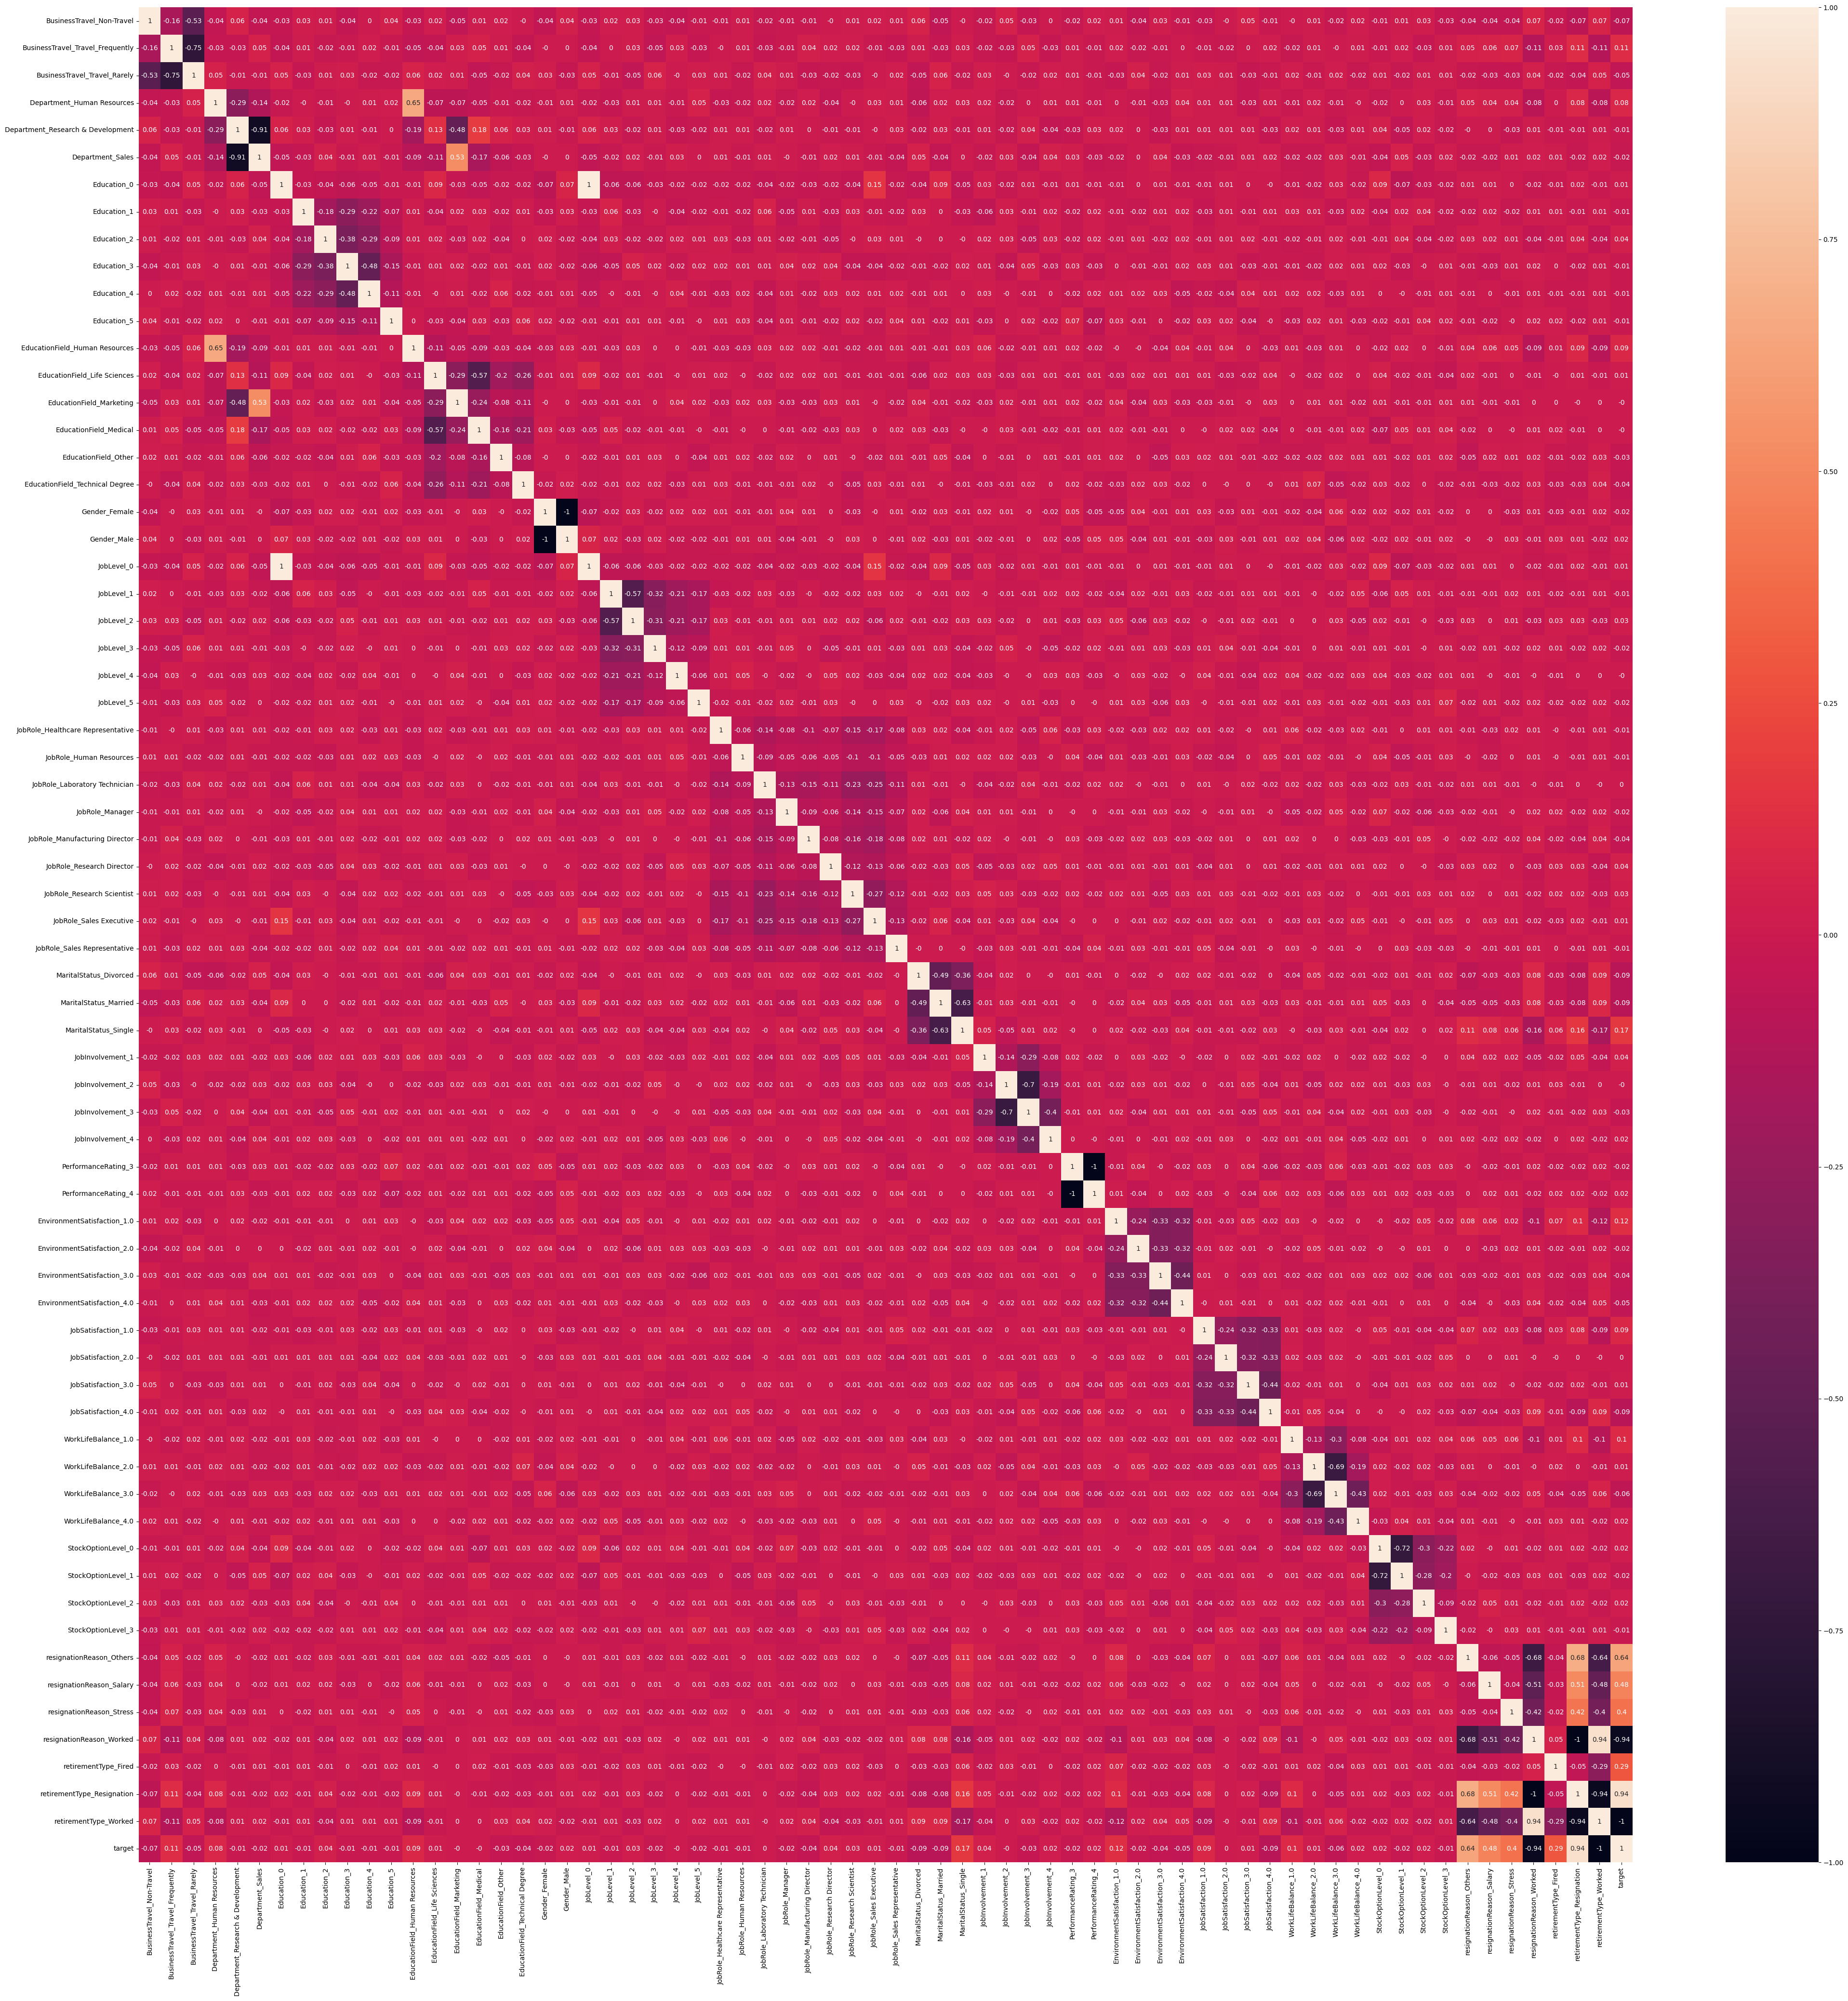

In [23]:
# Se realiza la matriz de correlación para analizar la dependencia de la variable target con las demás
plt.figure(figsize=(50,50))
sns.heatmap(round(df_dea2.corr(),2), annot=True)
plt.show()

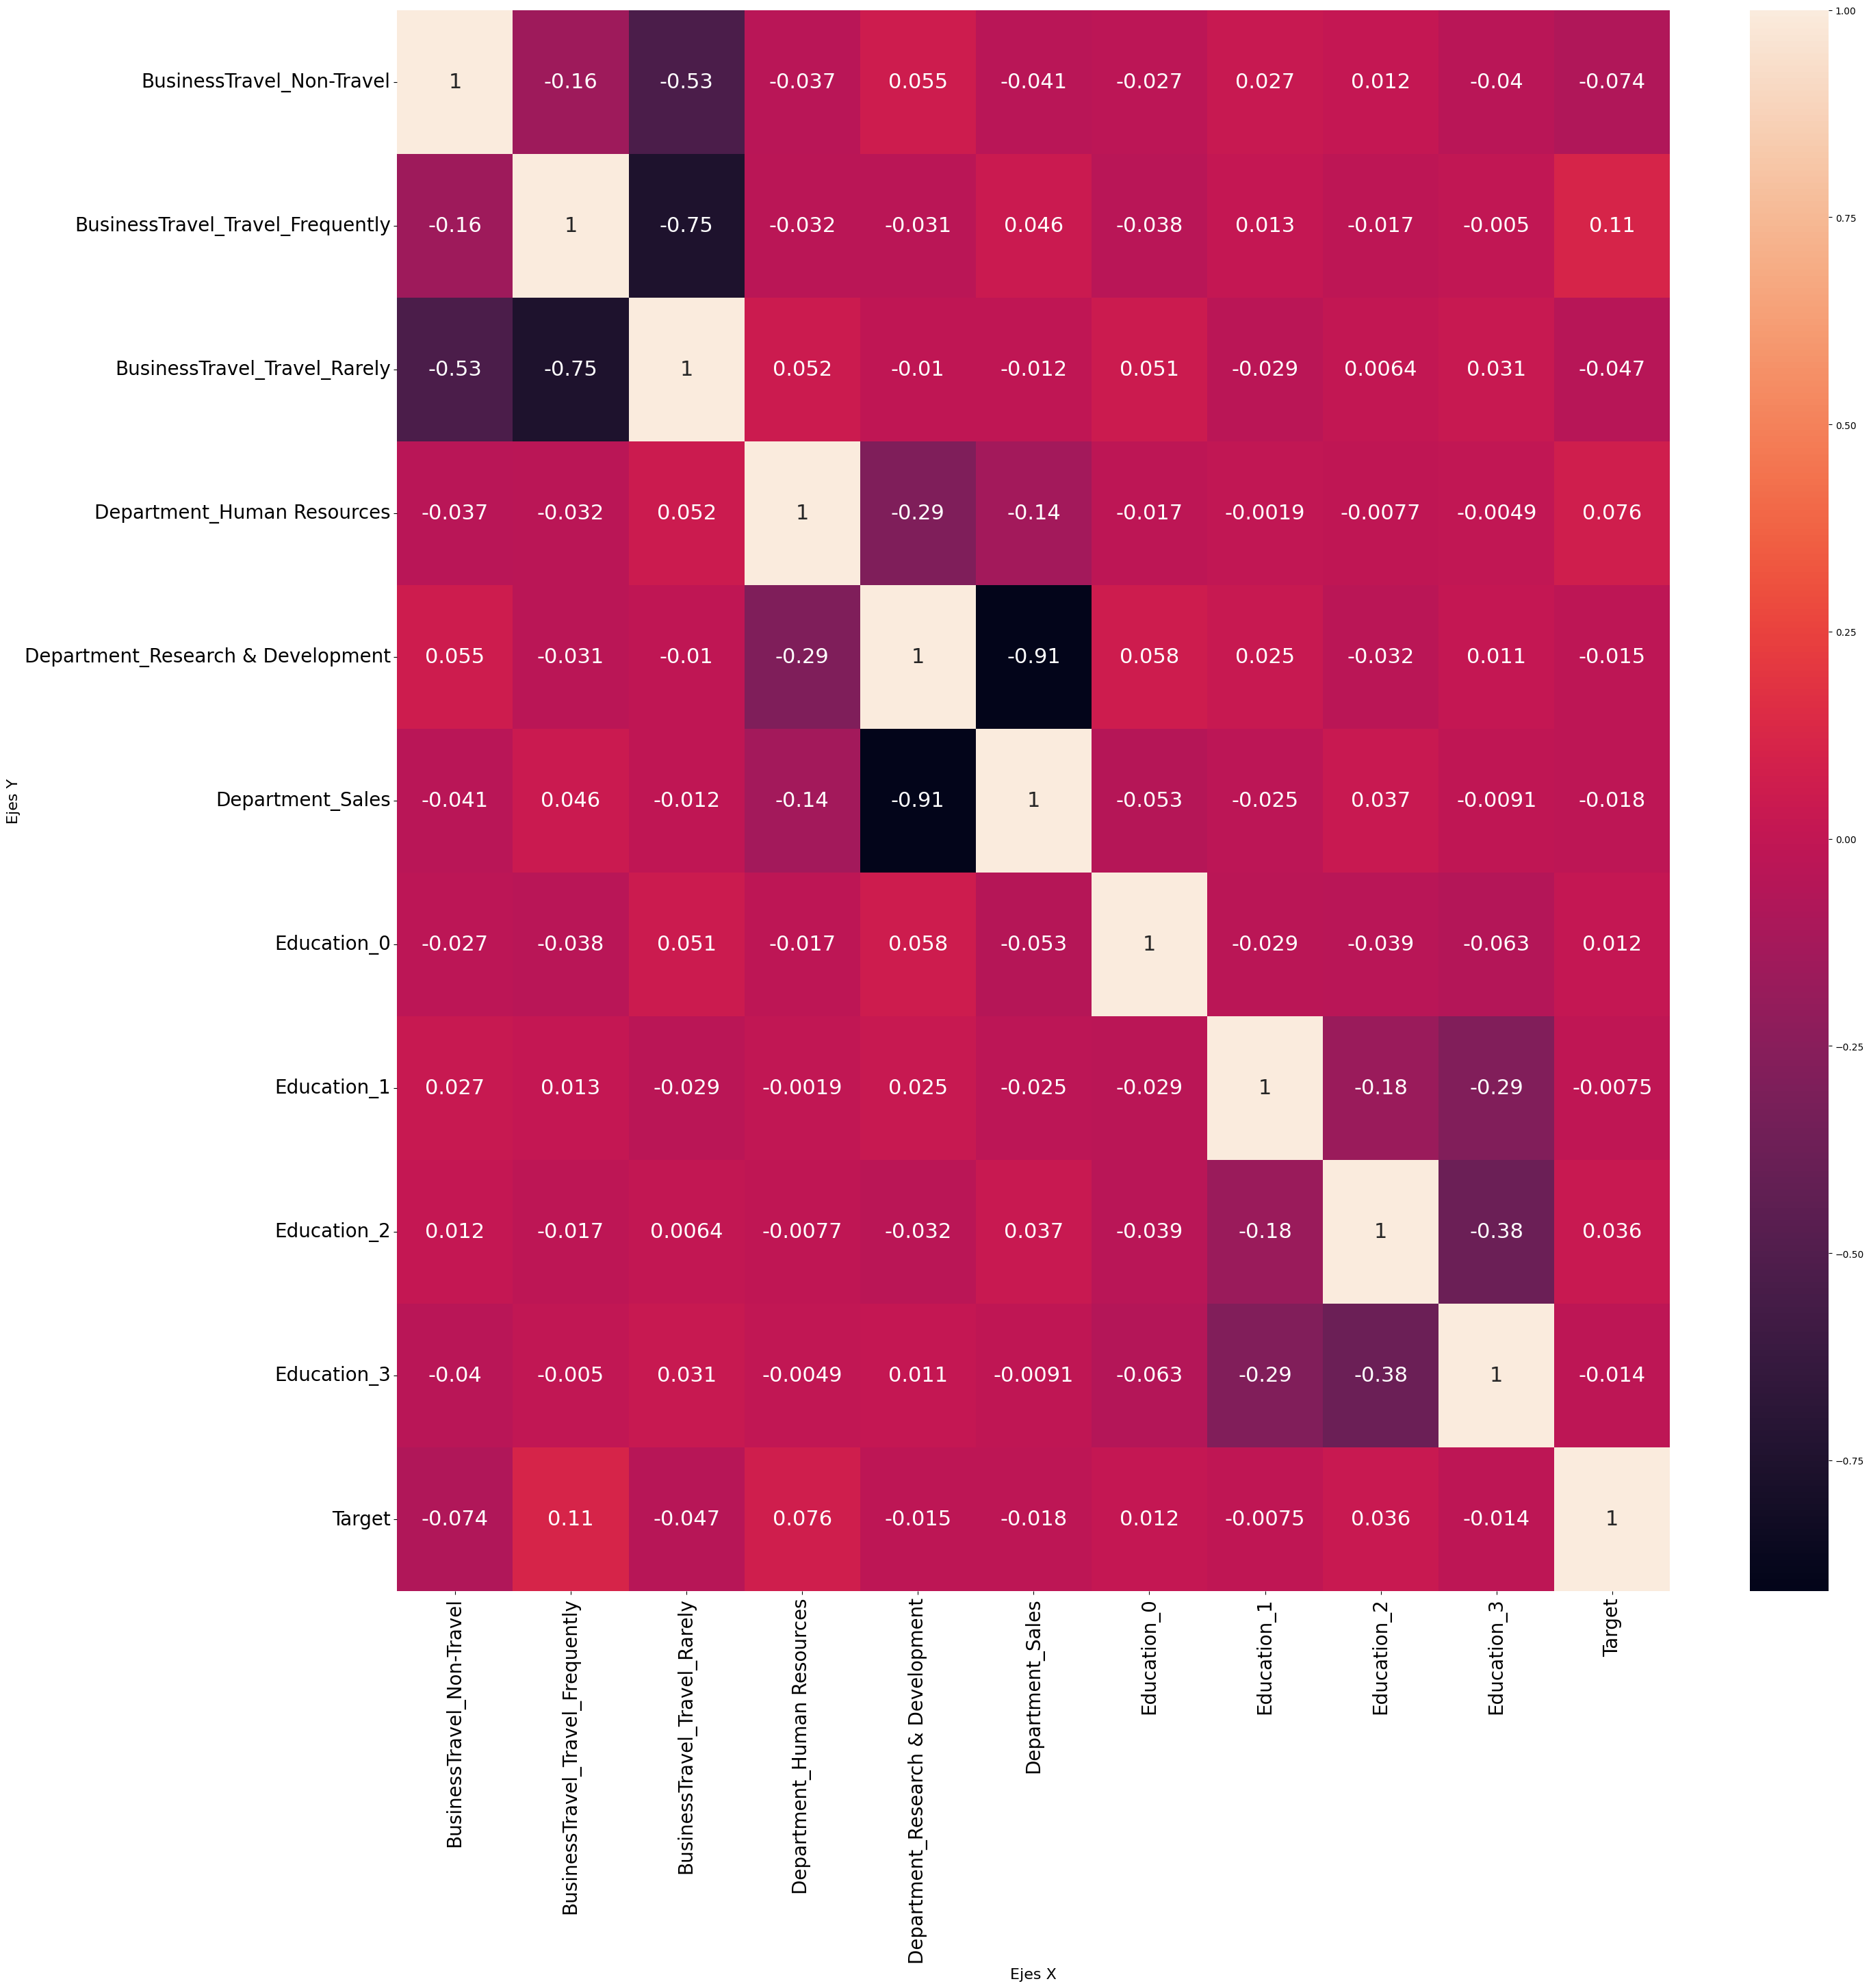

In [24]:
# Para interpretar mejor los resultados de la matriz de correlación, se decide dividir la matriz por variables
c1 = cat.iloc[:, 0:10]
c1['Target'] = y
plt.figure(figsize=(30, 30))
sns.heatmap(c1.corr(), annot=True, annot_kws={"size": 22})

# Ajustar el tamaño de las leyendas y etiquetas de ejes
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Ejes X", fontsize=16)  # Ajusta el tamaño de las etiquetas X
plt.ylabel("Ejes Y", fontsize=16)  # Ajusta el tamaño de las etiquetas Y

plt.show()

businesstravl_travel_frequently deparment_human_resourses businesstravel_non-travel

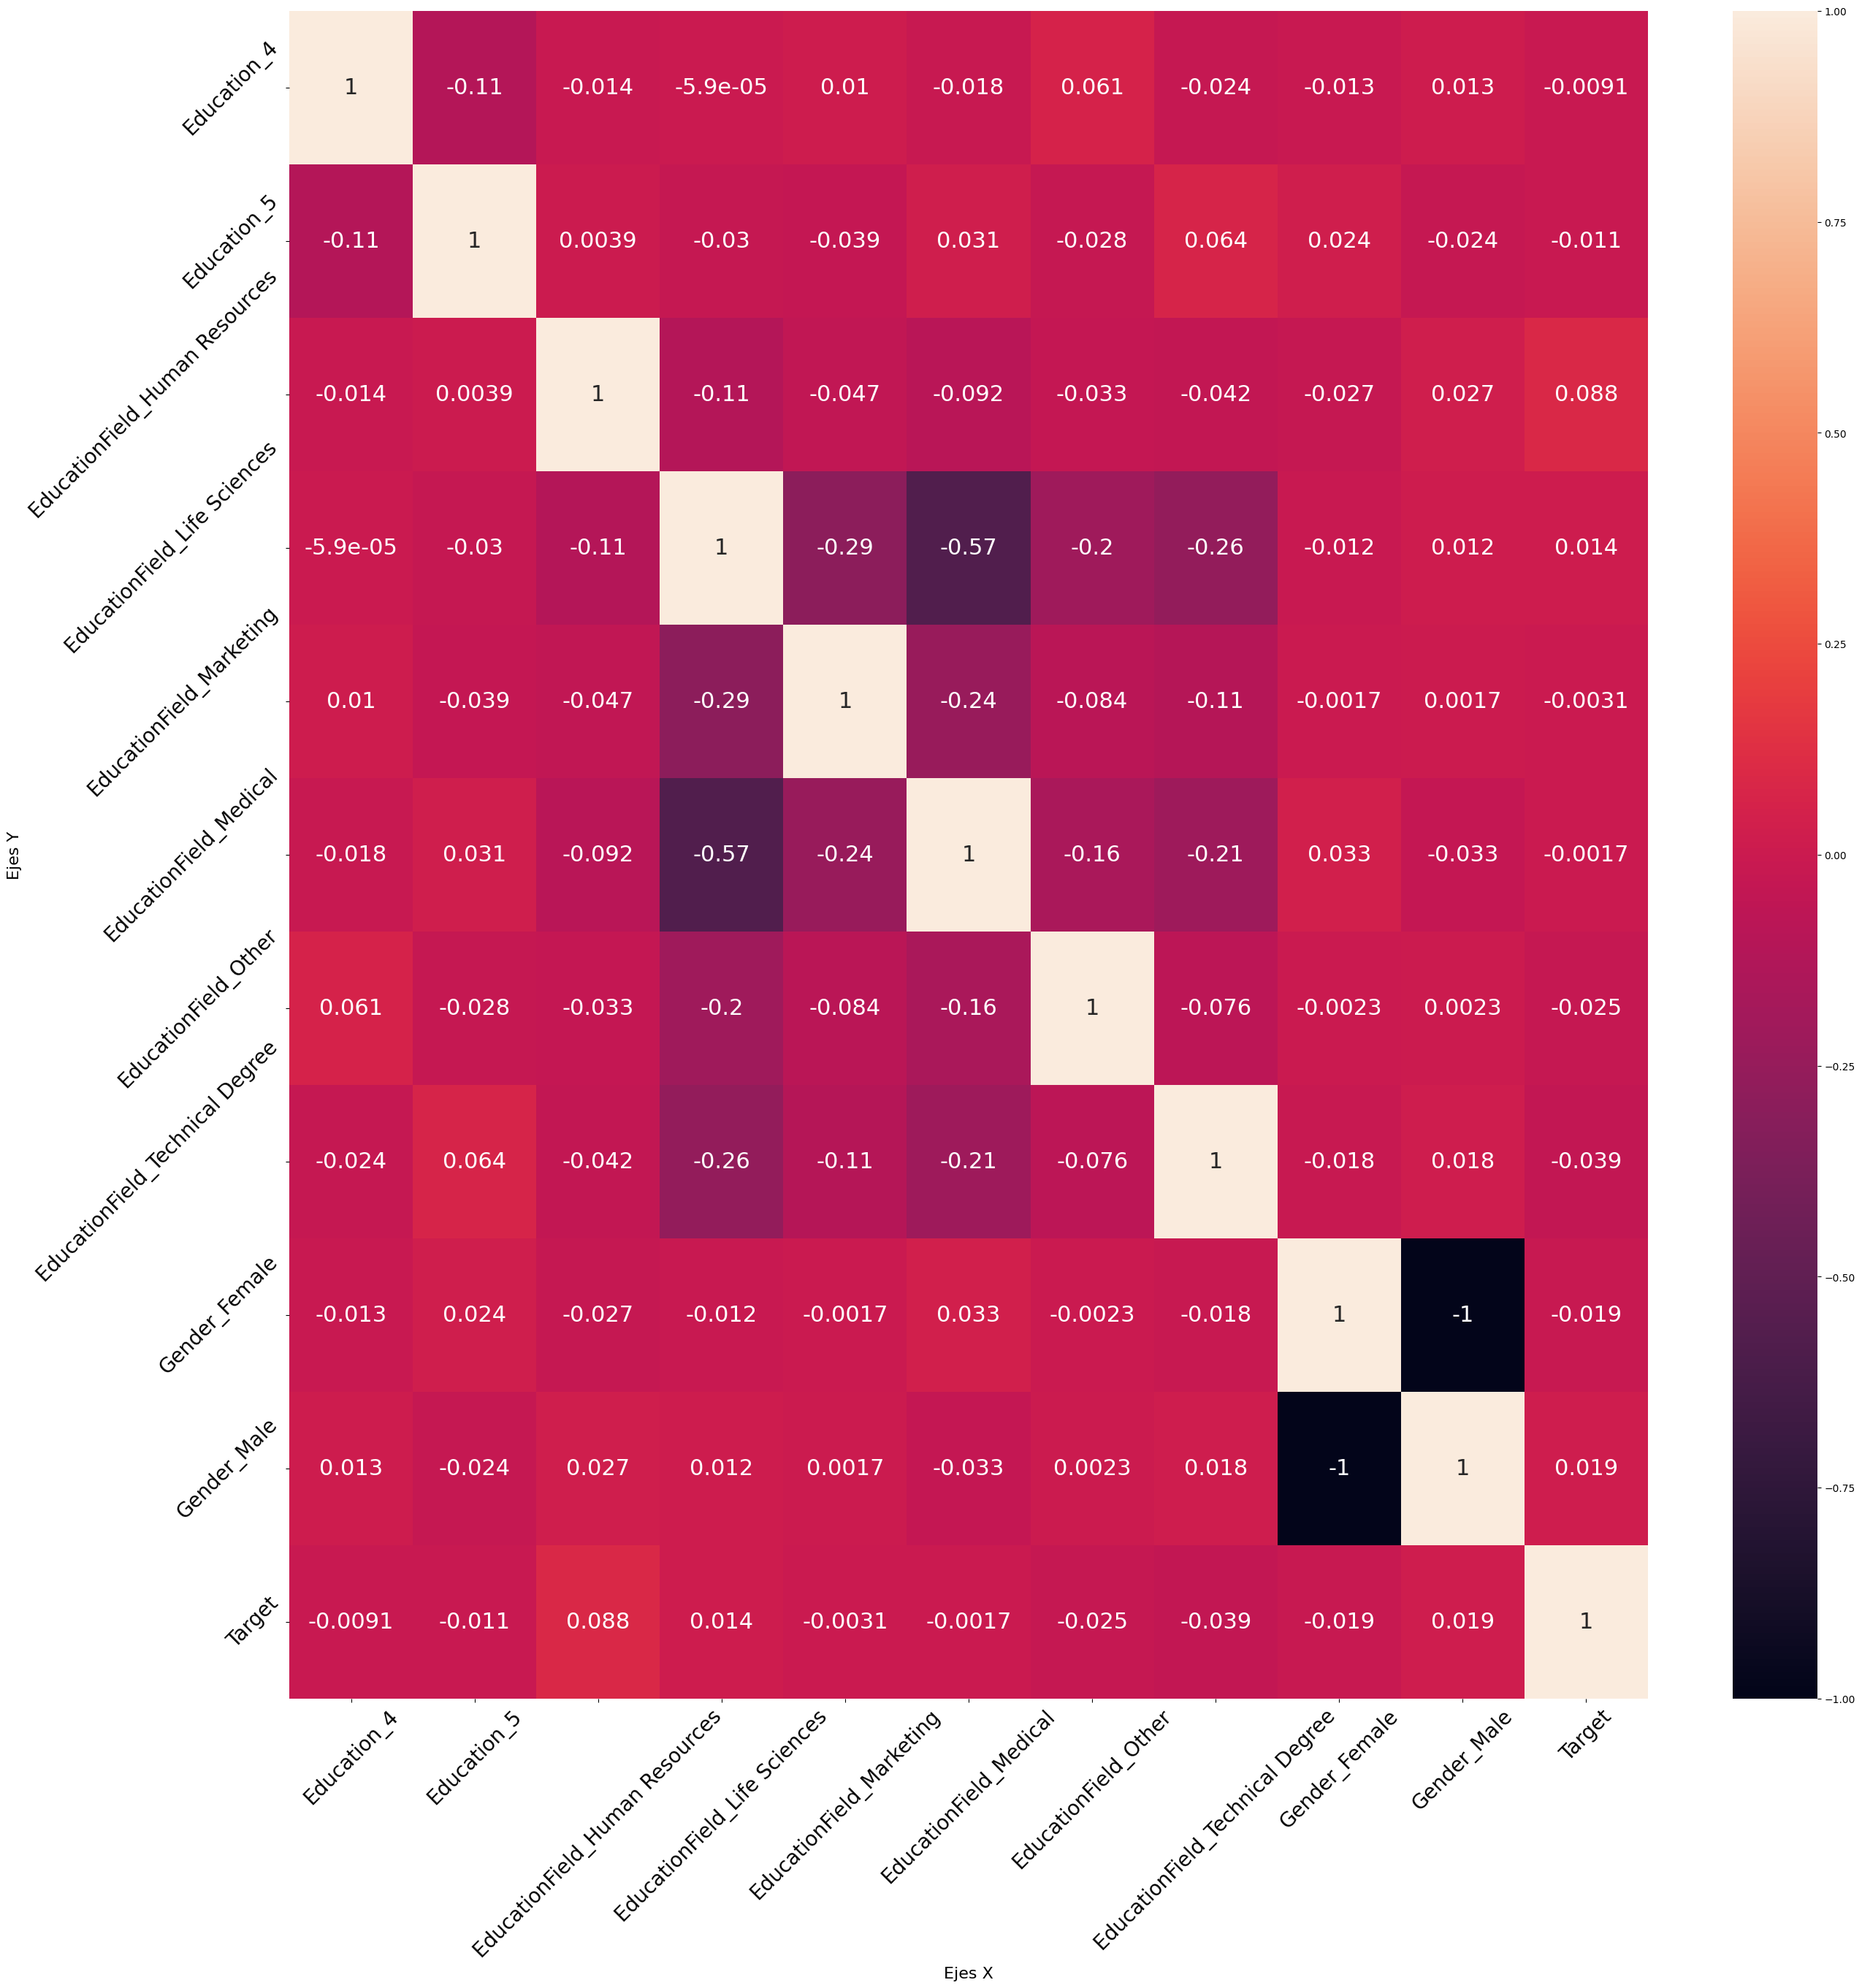

In [25]:
# Para interpretar mejor los resultados de la matriz de correlación, se decide dividir la matriz por variables
c1 = cat.iloc[:,10:20]
c1['Target'] = y
plt.figure(figsize=(30, 30))
sns.heatmap(c1.corr(), annot=True, annot_kws={"size": 22})

# Ajustar el tamaño de las leyendas y etiquetas de ejes
plt.xticks(rotation=45, fontsize=20)
plt.yticks(rotation=45, fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Ejes X", fontsize=16)  # Ajusta el tamaño de las etiquetas X
plt.ylabel("Ejes Y", fontsize=16)  # Ajusta el tamaño de las etiquetas Y

plt.show()

educationfield_human Resources

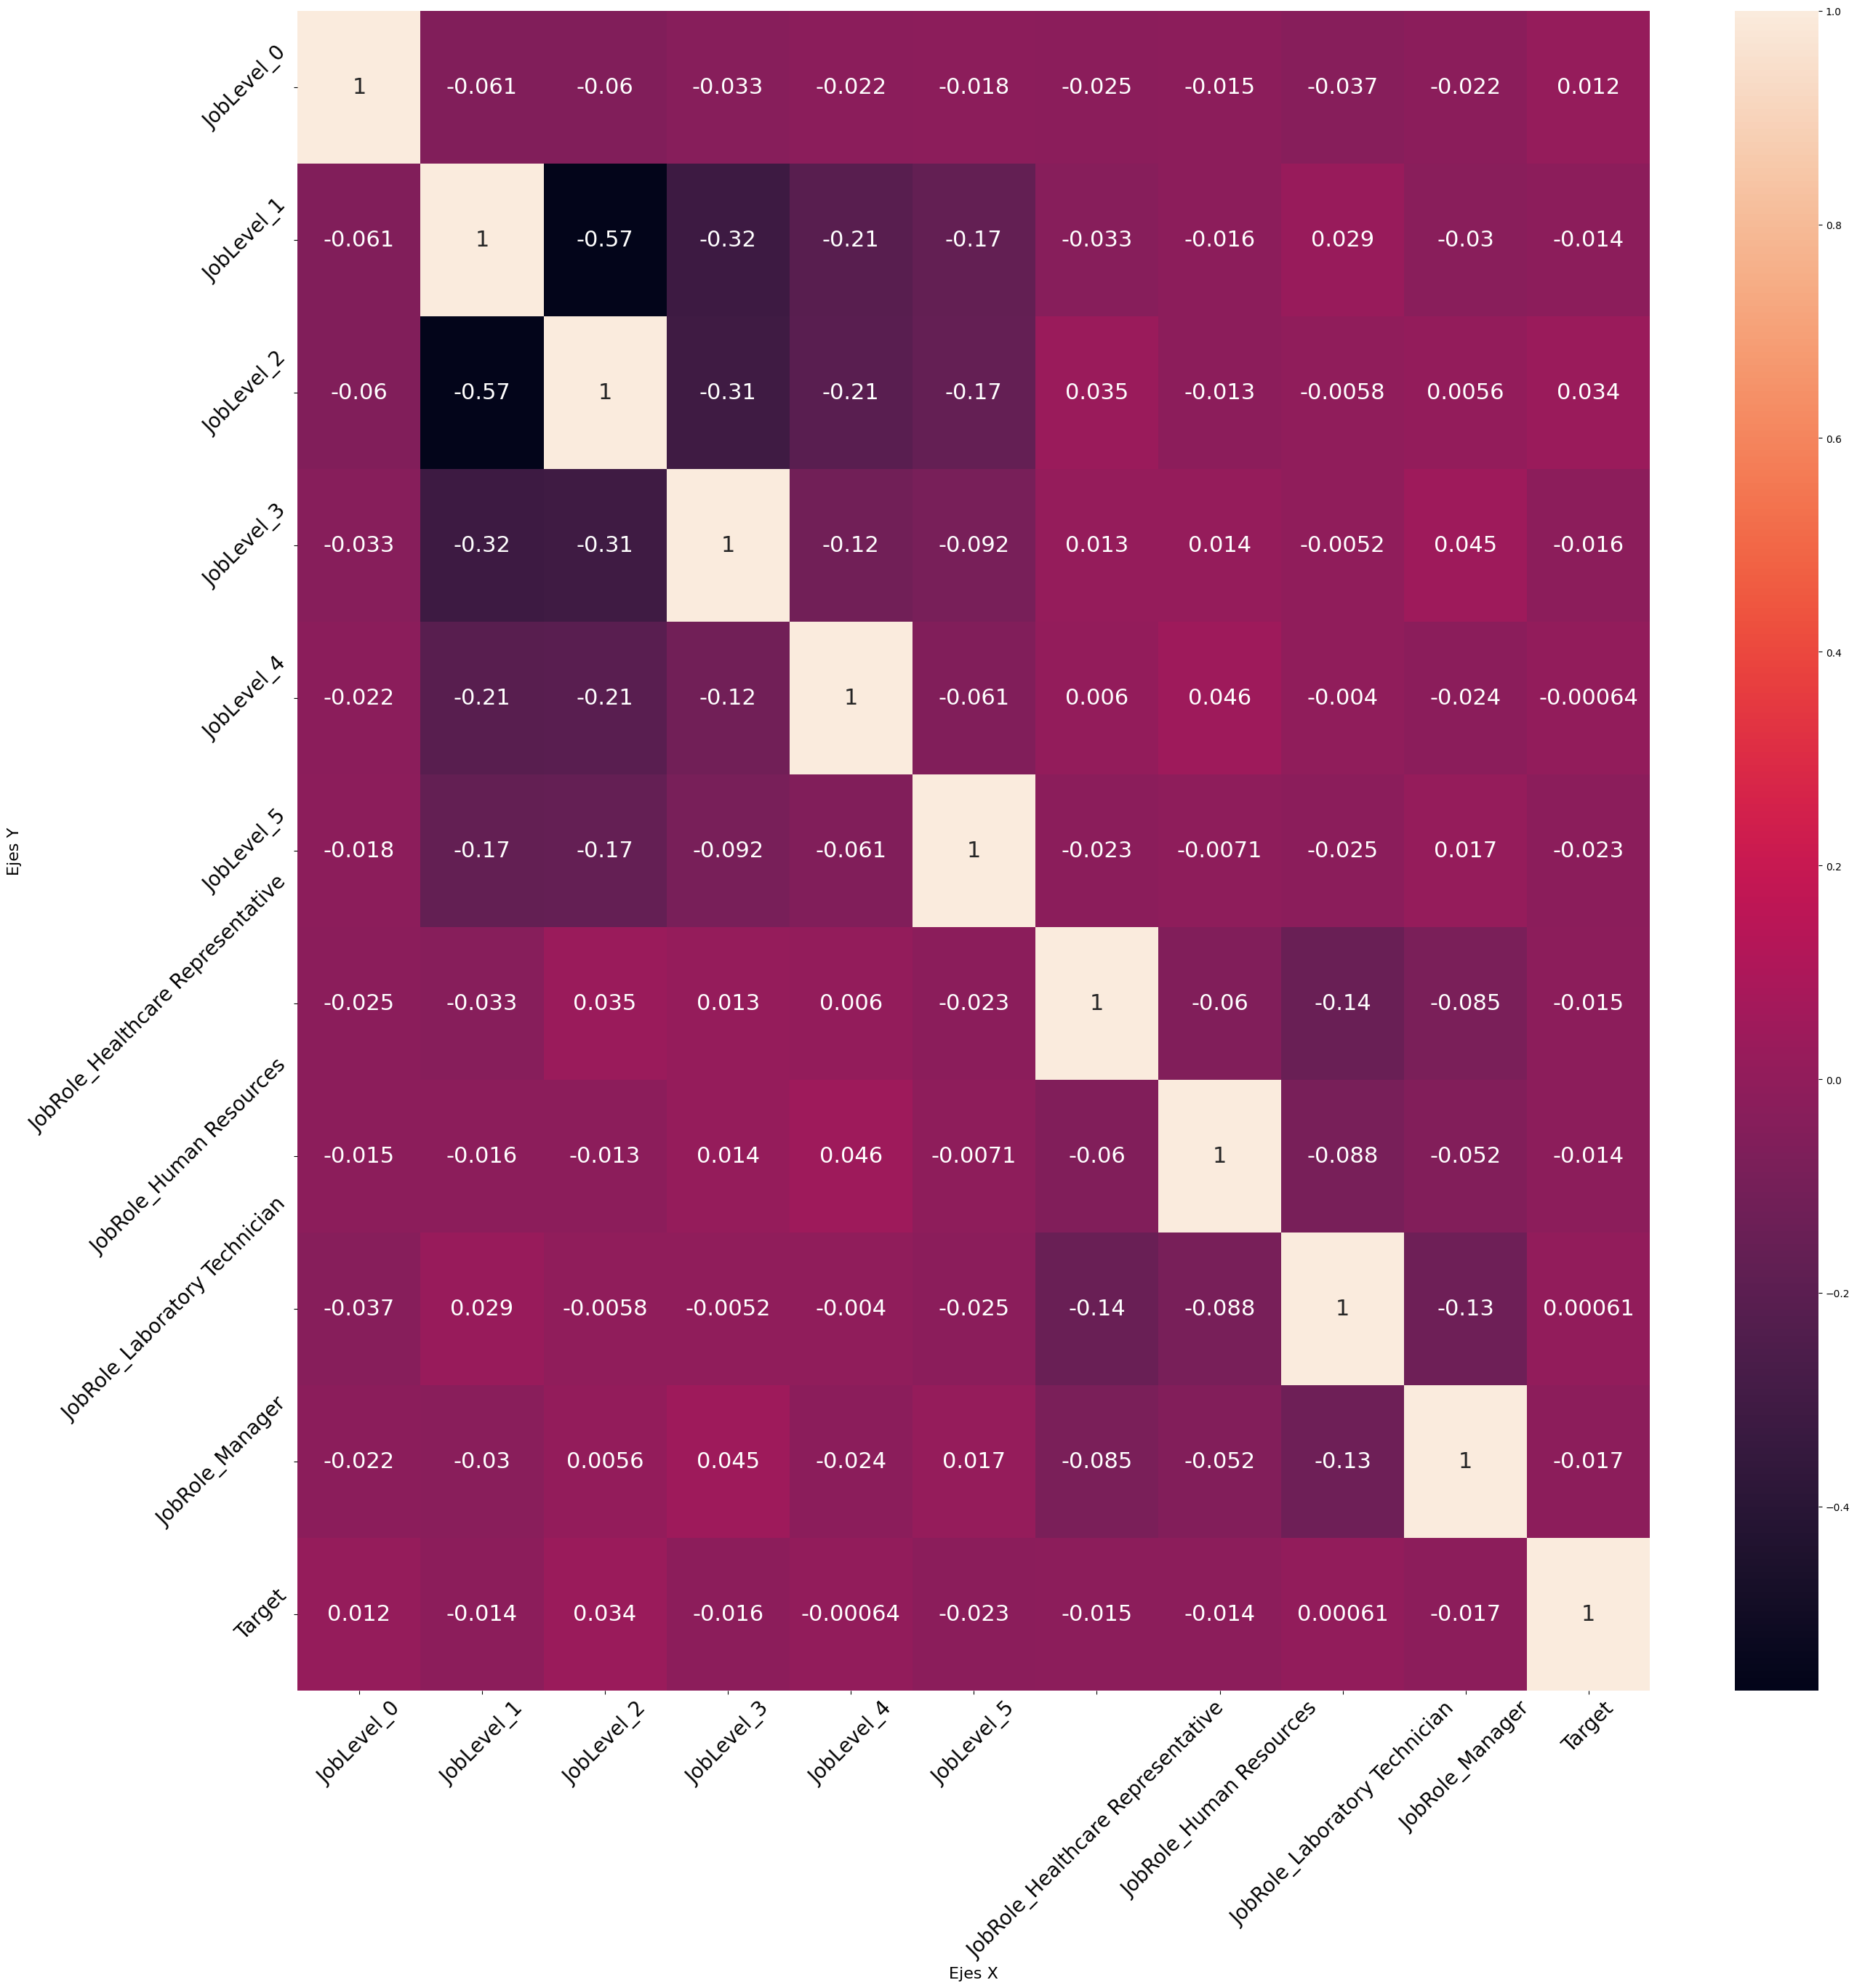

In [26]:
# Para interpretar mejor los resultados de la matriz de correlación, se decide dividir la matriz por variables
c1 = cat.iloc[:,20:30]
c1['Target'] = y
plt.figure(figsize=(30, 30))
sns.heatmap(c1.corr(), annot=True, annot_kws={"size": 22})

# Ajustar el tamaño de las leyendas y etiquetas de ejes
plt.xticks(rotation=45, fontsize=20)
plt.yticks(rotation=45, fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Ejes X", fontsize=16)  # Ajusta el tamaño de las etiquetas X
plt.ylabel("Ejes Y", fontsize=16)  # Ajusta el tamaño de las etiquetas Y

plt.show()

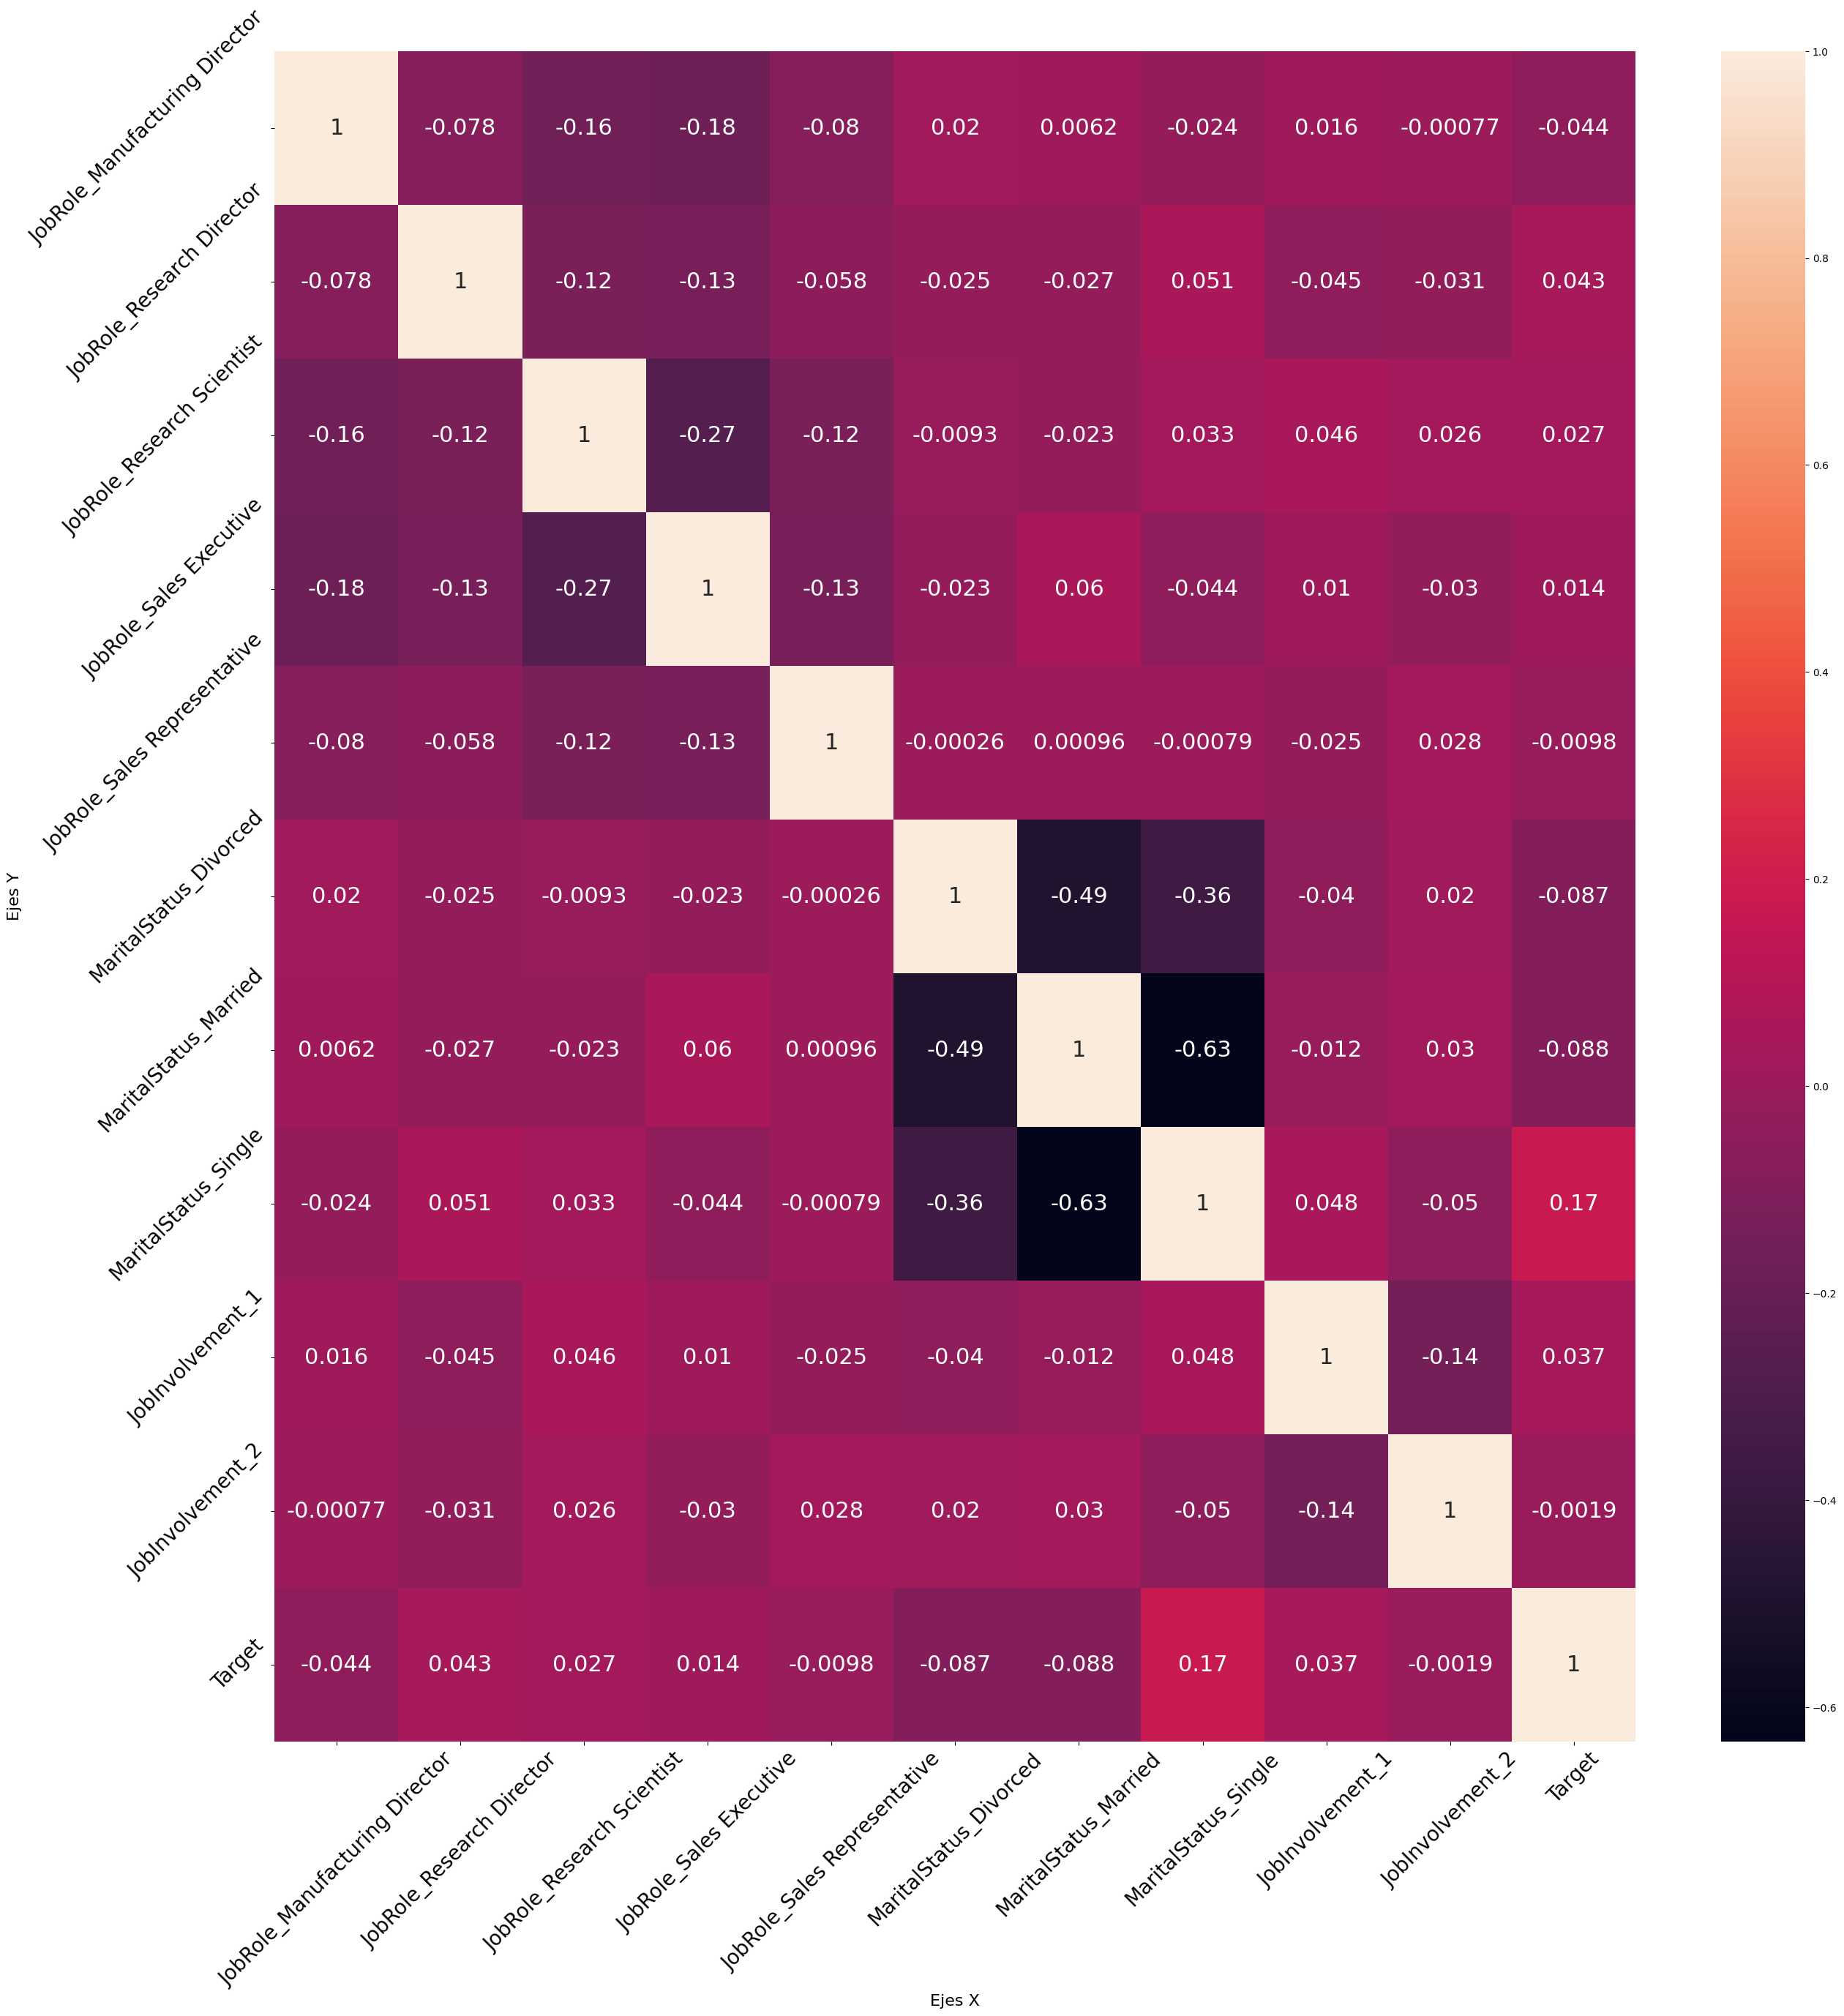

In [27]:
# Para interpretar mejor los resultados de la matriz de correlación, se decide dividir la matriz por variables
c1 = cat.iloc[:,30:40]
c1['Target'] = y
plt.figure(figsize=(30, 30))
sns.heatmap(c1.corr(), annot=True, annot_kws={"size": 22})

# Ajustar el tamaño de las leyendas y etiquetas de ejes
plt.xticks(rotation=45, fontsize=20)
plt.yticks(rotation=45, fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Ejes X", fontsize=16)  # Ajusta el tamaño de las etiquetas X
plt.ylabel("Ejes Y", fontsize=16)  # Ajusta el tamaño de las etiquetas Y

plt.show()

Jobrole_sales executive maritalstatus_divorced maritalstatus_single 

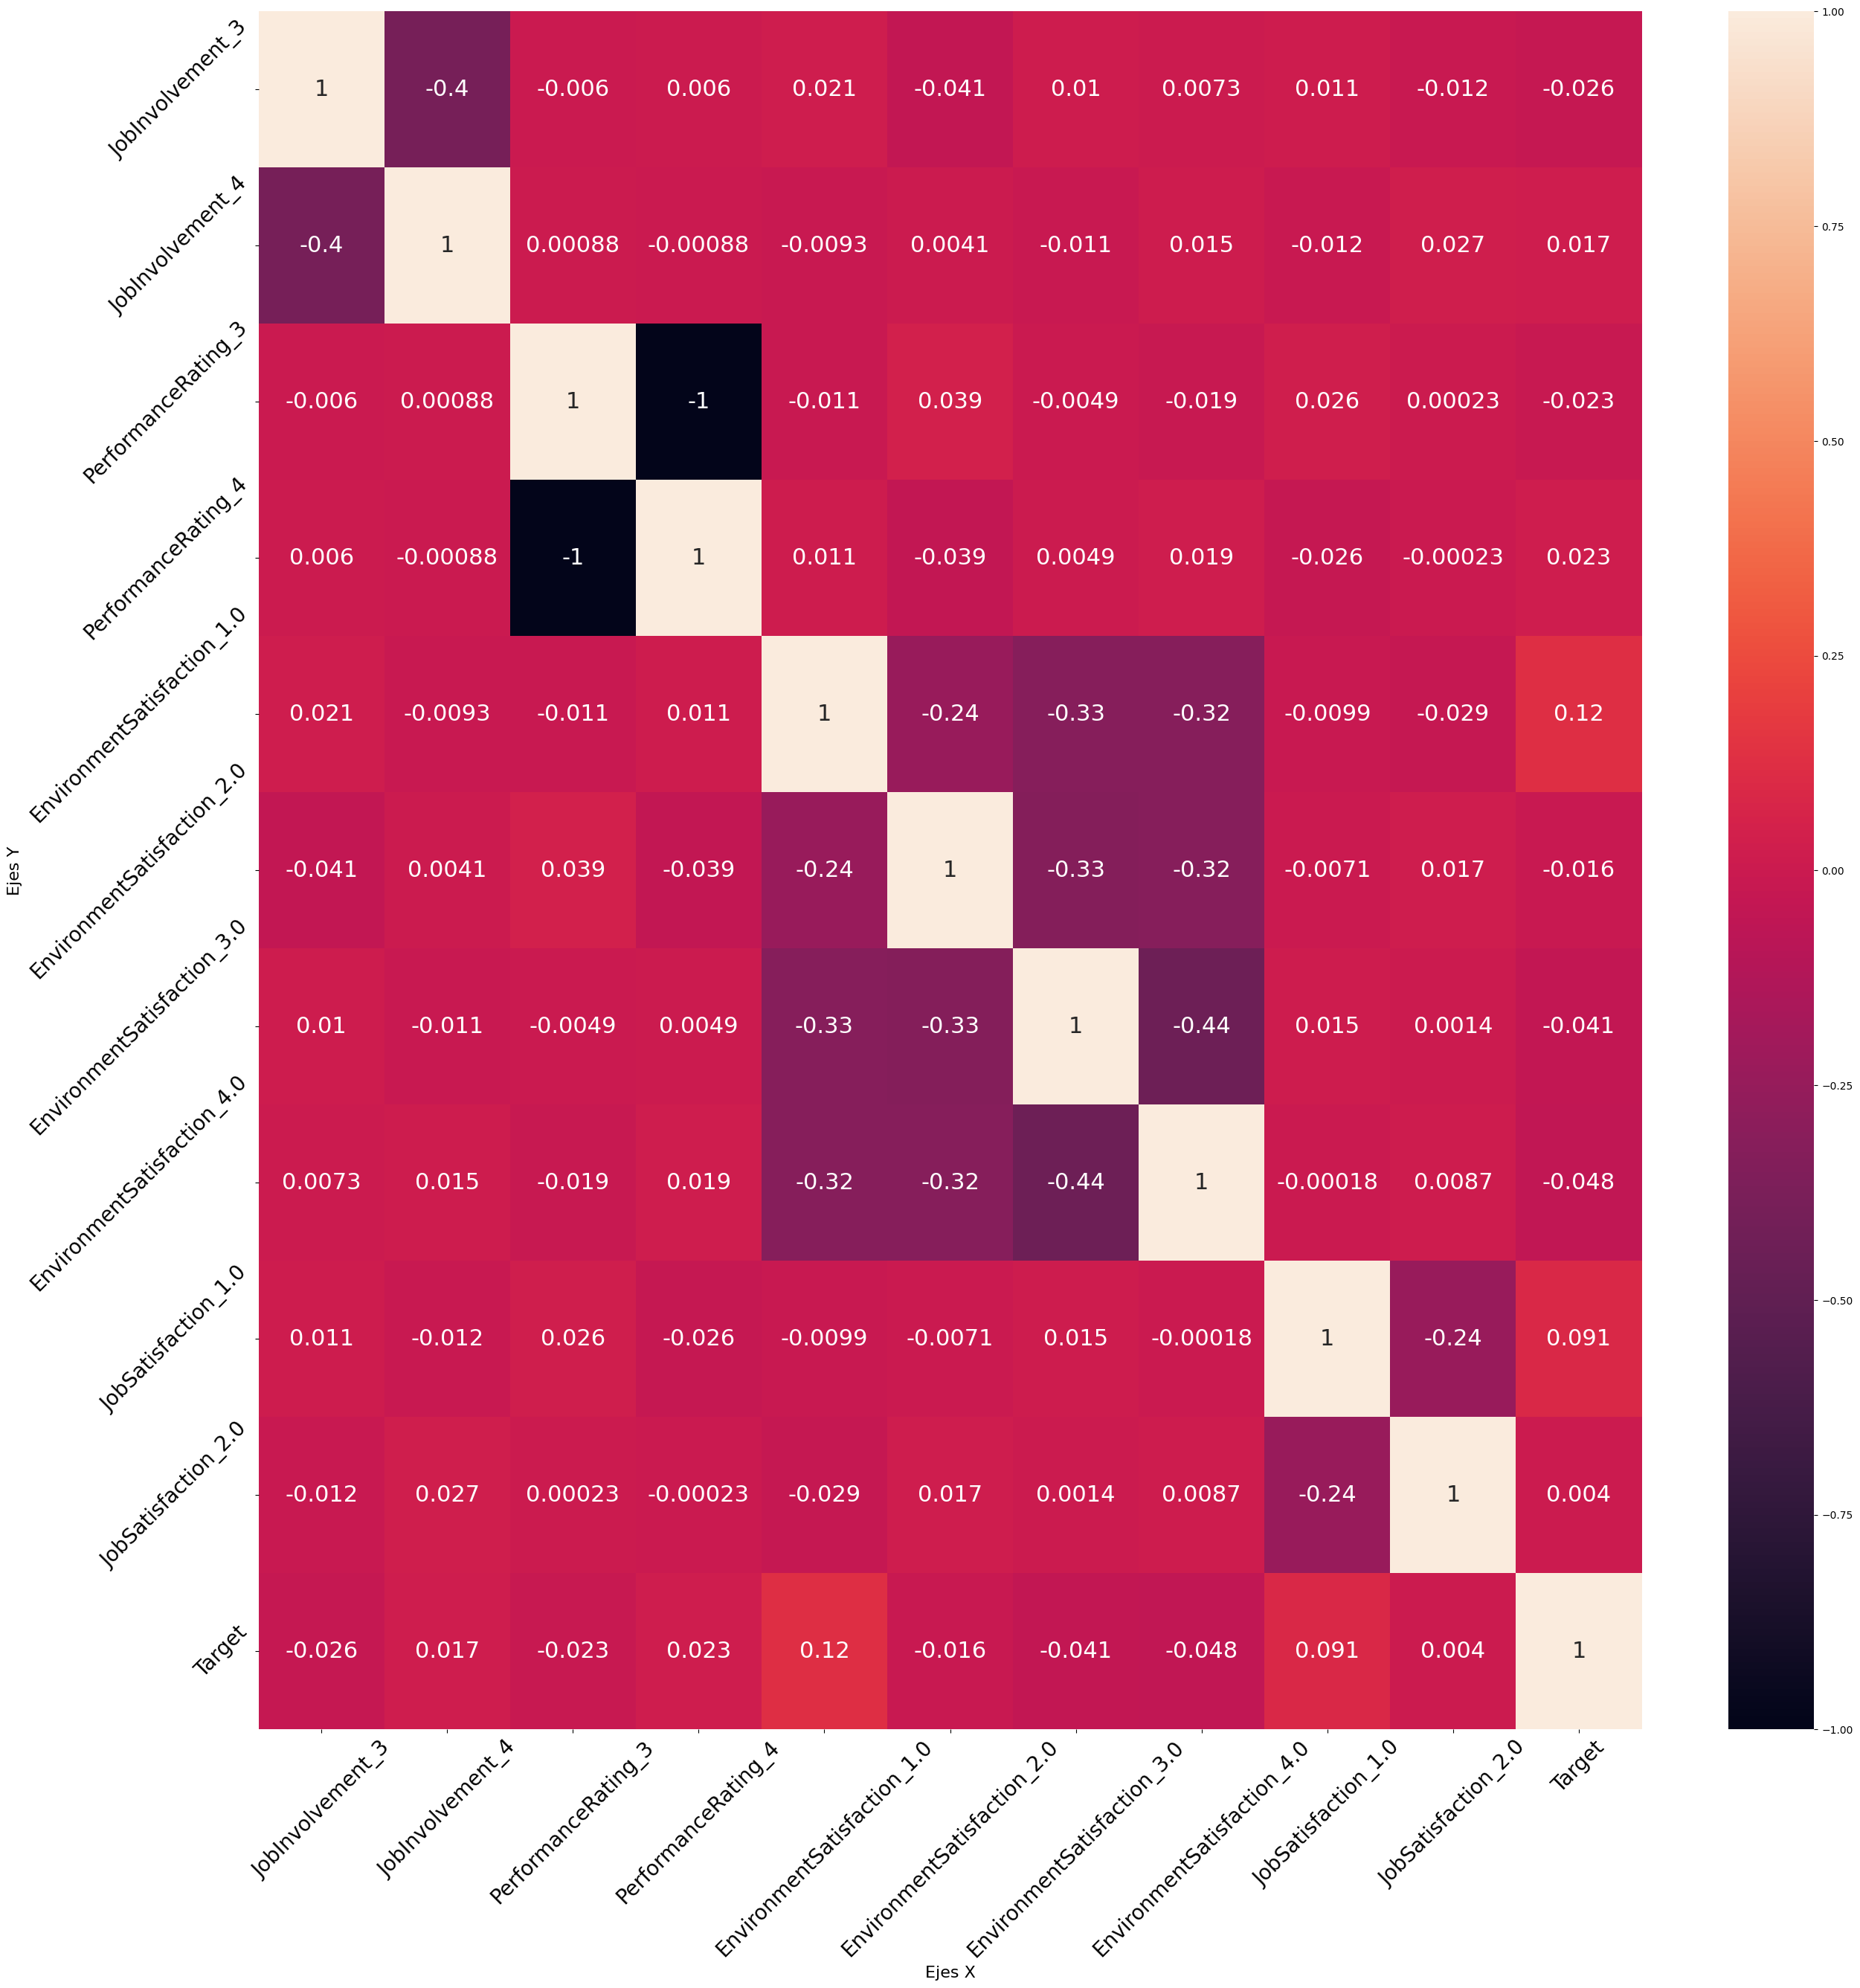

In [28]:
# Para interpretar mejor los resultados de la matriz de correlación, se decide dividir la matriz por variables
c1 = cat.iloc[:,40:50]
c1['Target'] = y
plt.figure(figsize=(30, 30))
sns.heatmap(c1.corr(), annot=True, annot_kws={"size": 22})

# Ajustar el tamaño de las leyendas y etiquetas de ejes
plt.xticks(rotation=45, fontsize=20)
plt.yticks(rotation=45, fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Ejes X", fontsize=16)  # Ajusta el tamaño de las etiquetas X
plt.ylabel("Ejes Y", fontsize=16)  # Ajusta el tamaño de las etiquetas Y

plt.show()

enviromentsatisfaction_1.0 jobsatisfaction_1.0

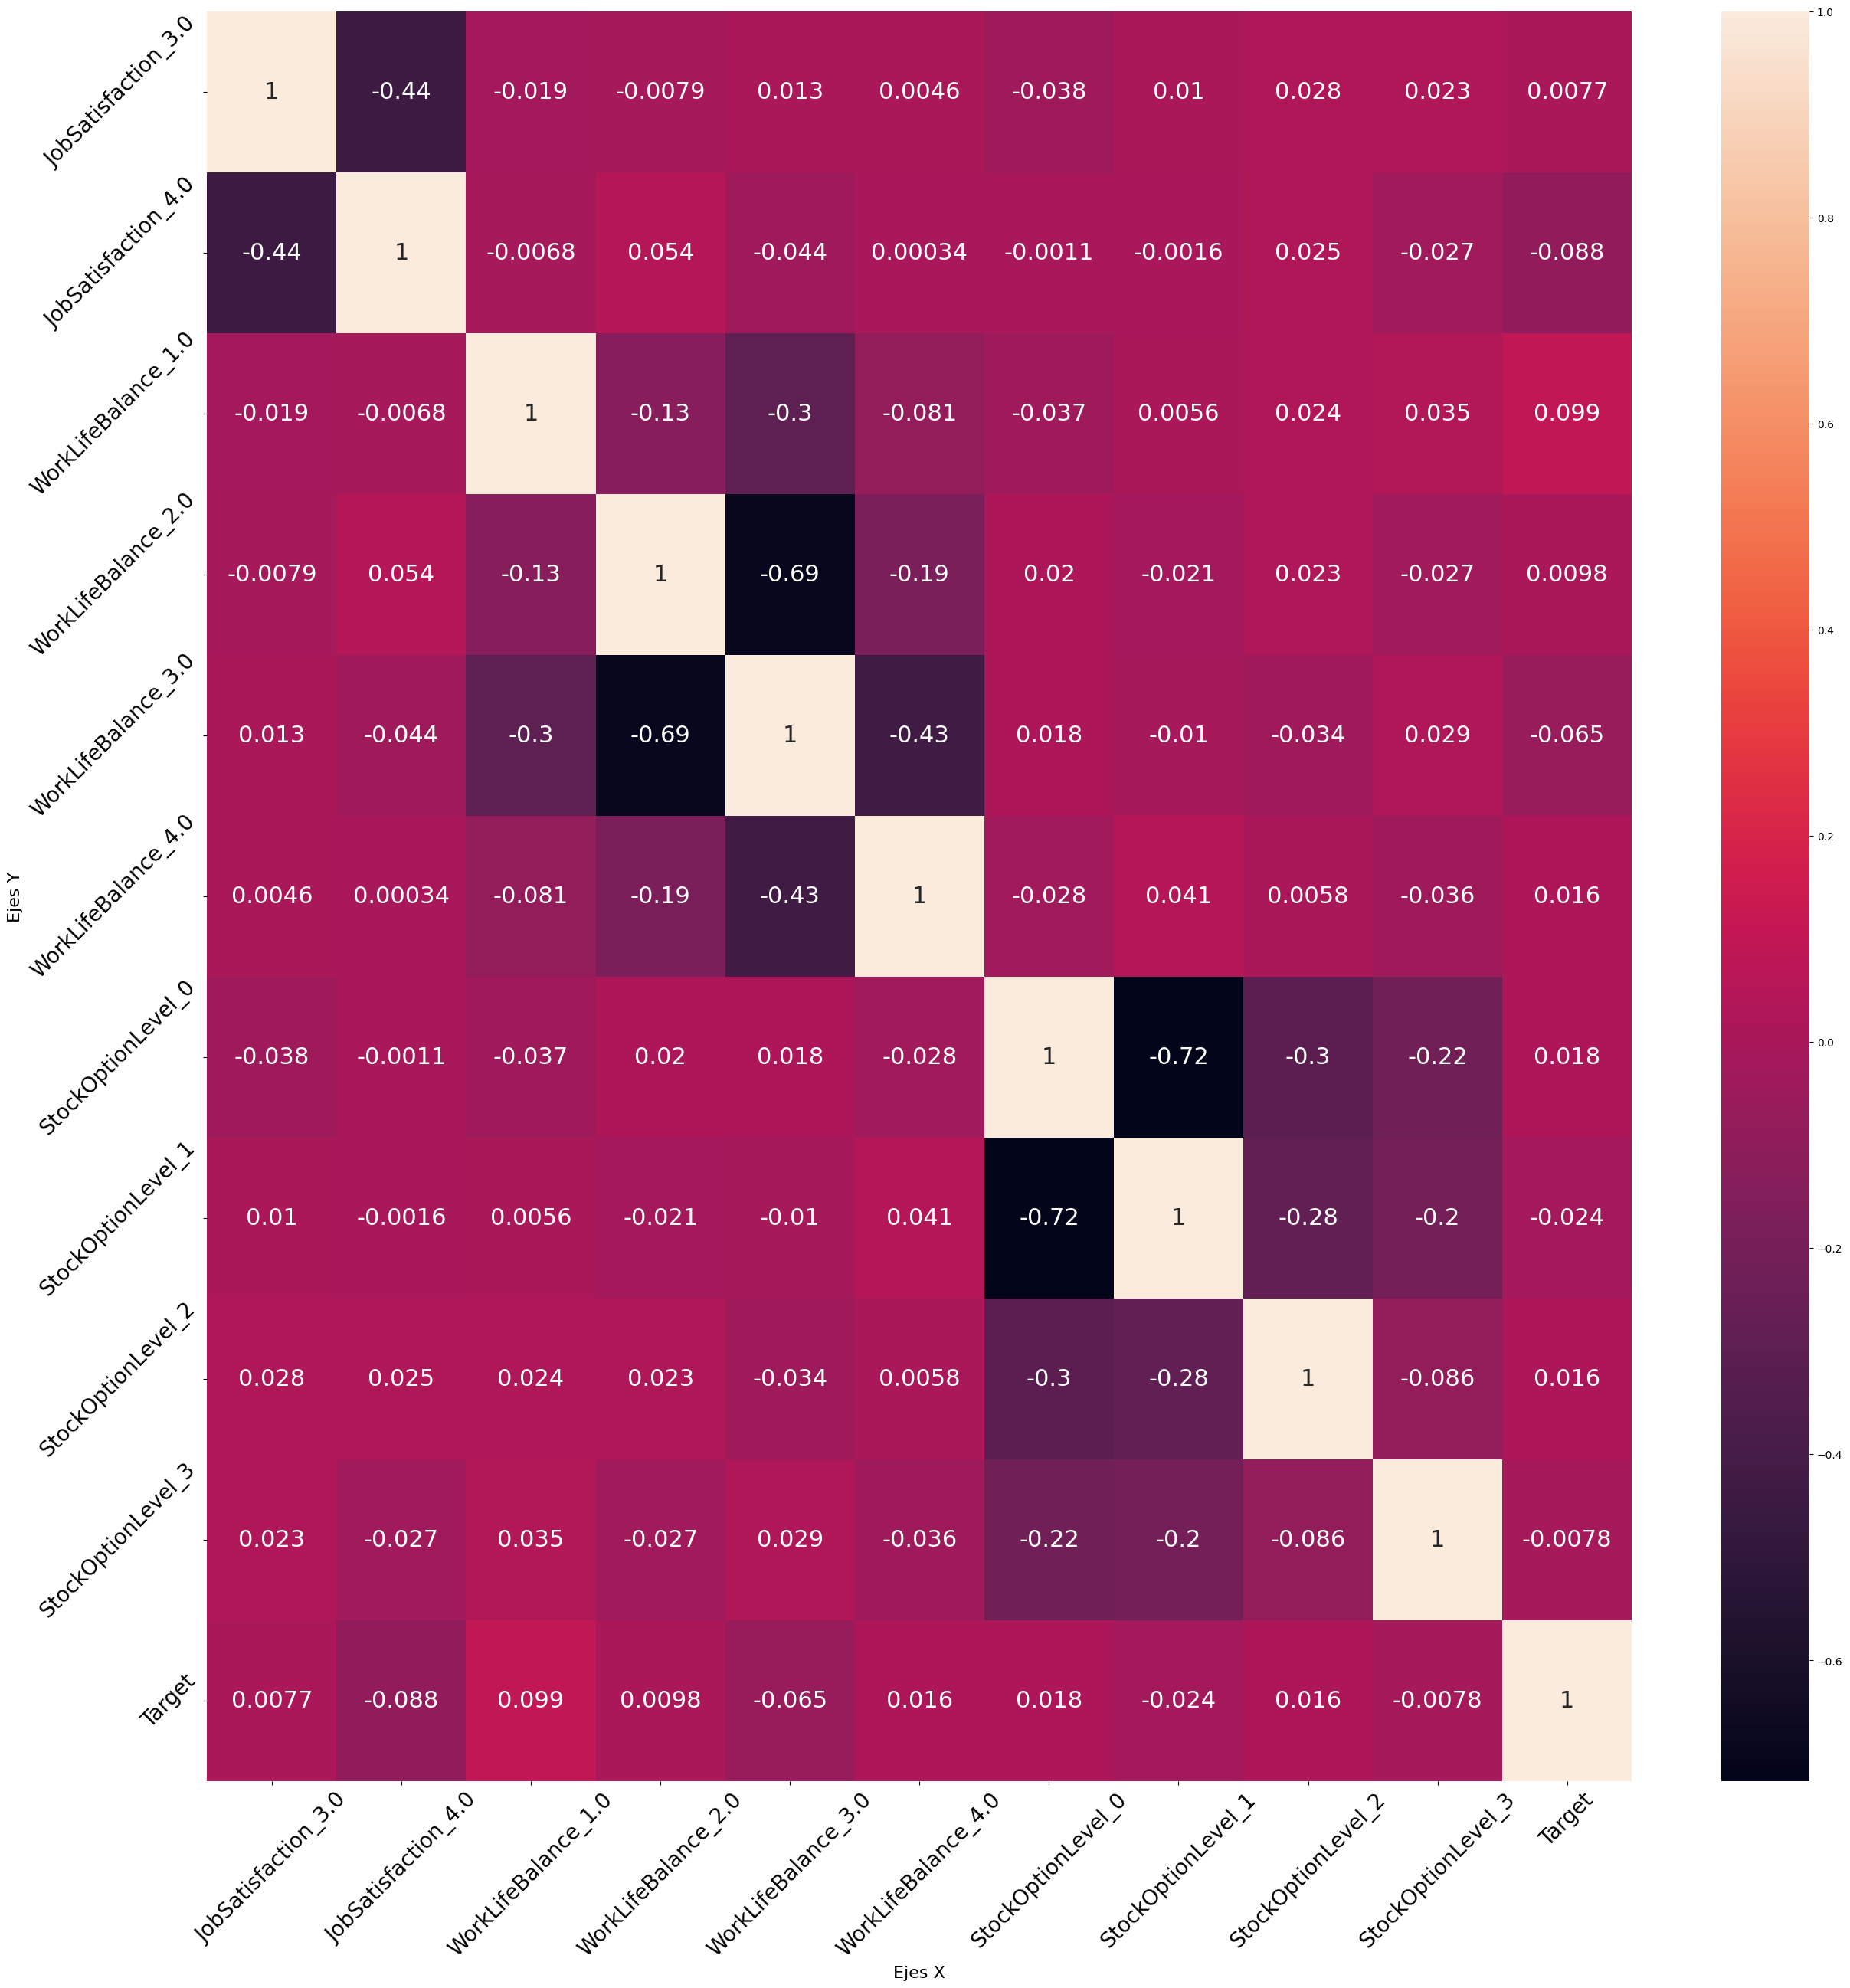

In [29]:
# Para interpretar mejor los resultados de la matriz de correlación, se decide dividir la matriz por variables
c1 = cat.iloc[:,50:60]
c1['Target'] = y
plt.figure(figsize=(30, 30))
sns.heatmap(c1.corr(), annot=True, annot_kws={"size": 22})

plt.xticks(rotation=45, fontsize=20)
plt.yticks(rotation=45, fontsize=20)  # Rotar 45 grados y ajustar el tamaño de letra
plt.yticks(fontsize=20)
plt.xlabel("Ejes X", fontsize=16)  # Ajusta el tamaño de las etiquetas X
plt.ylabel("Ejes Y", fontsize=16)

plt.show()

jobsatisfaction_4.0 worklifebalance_1.0 

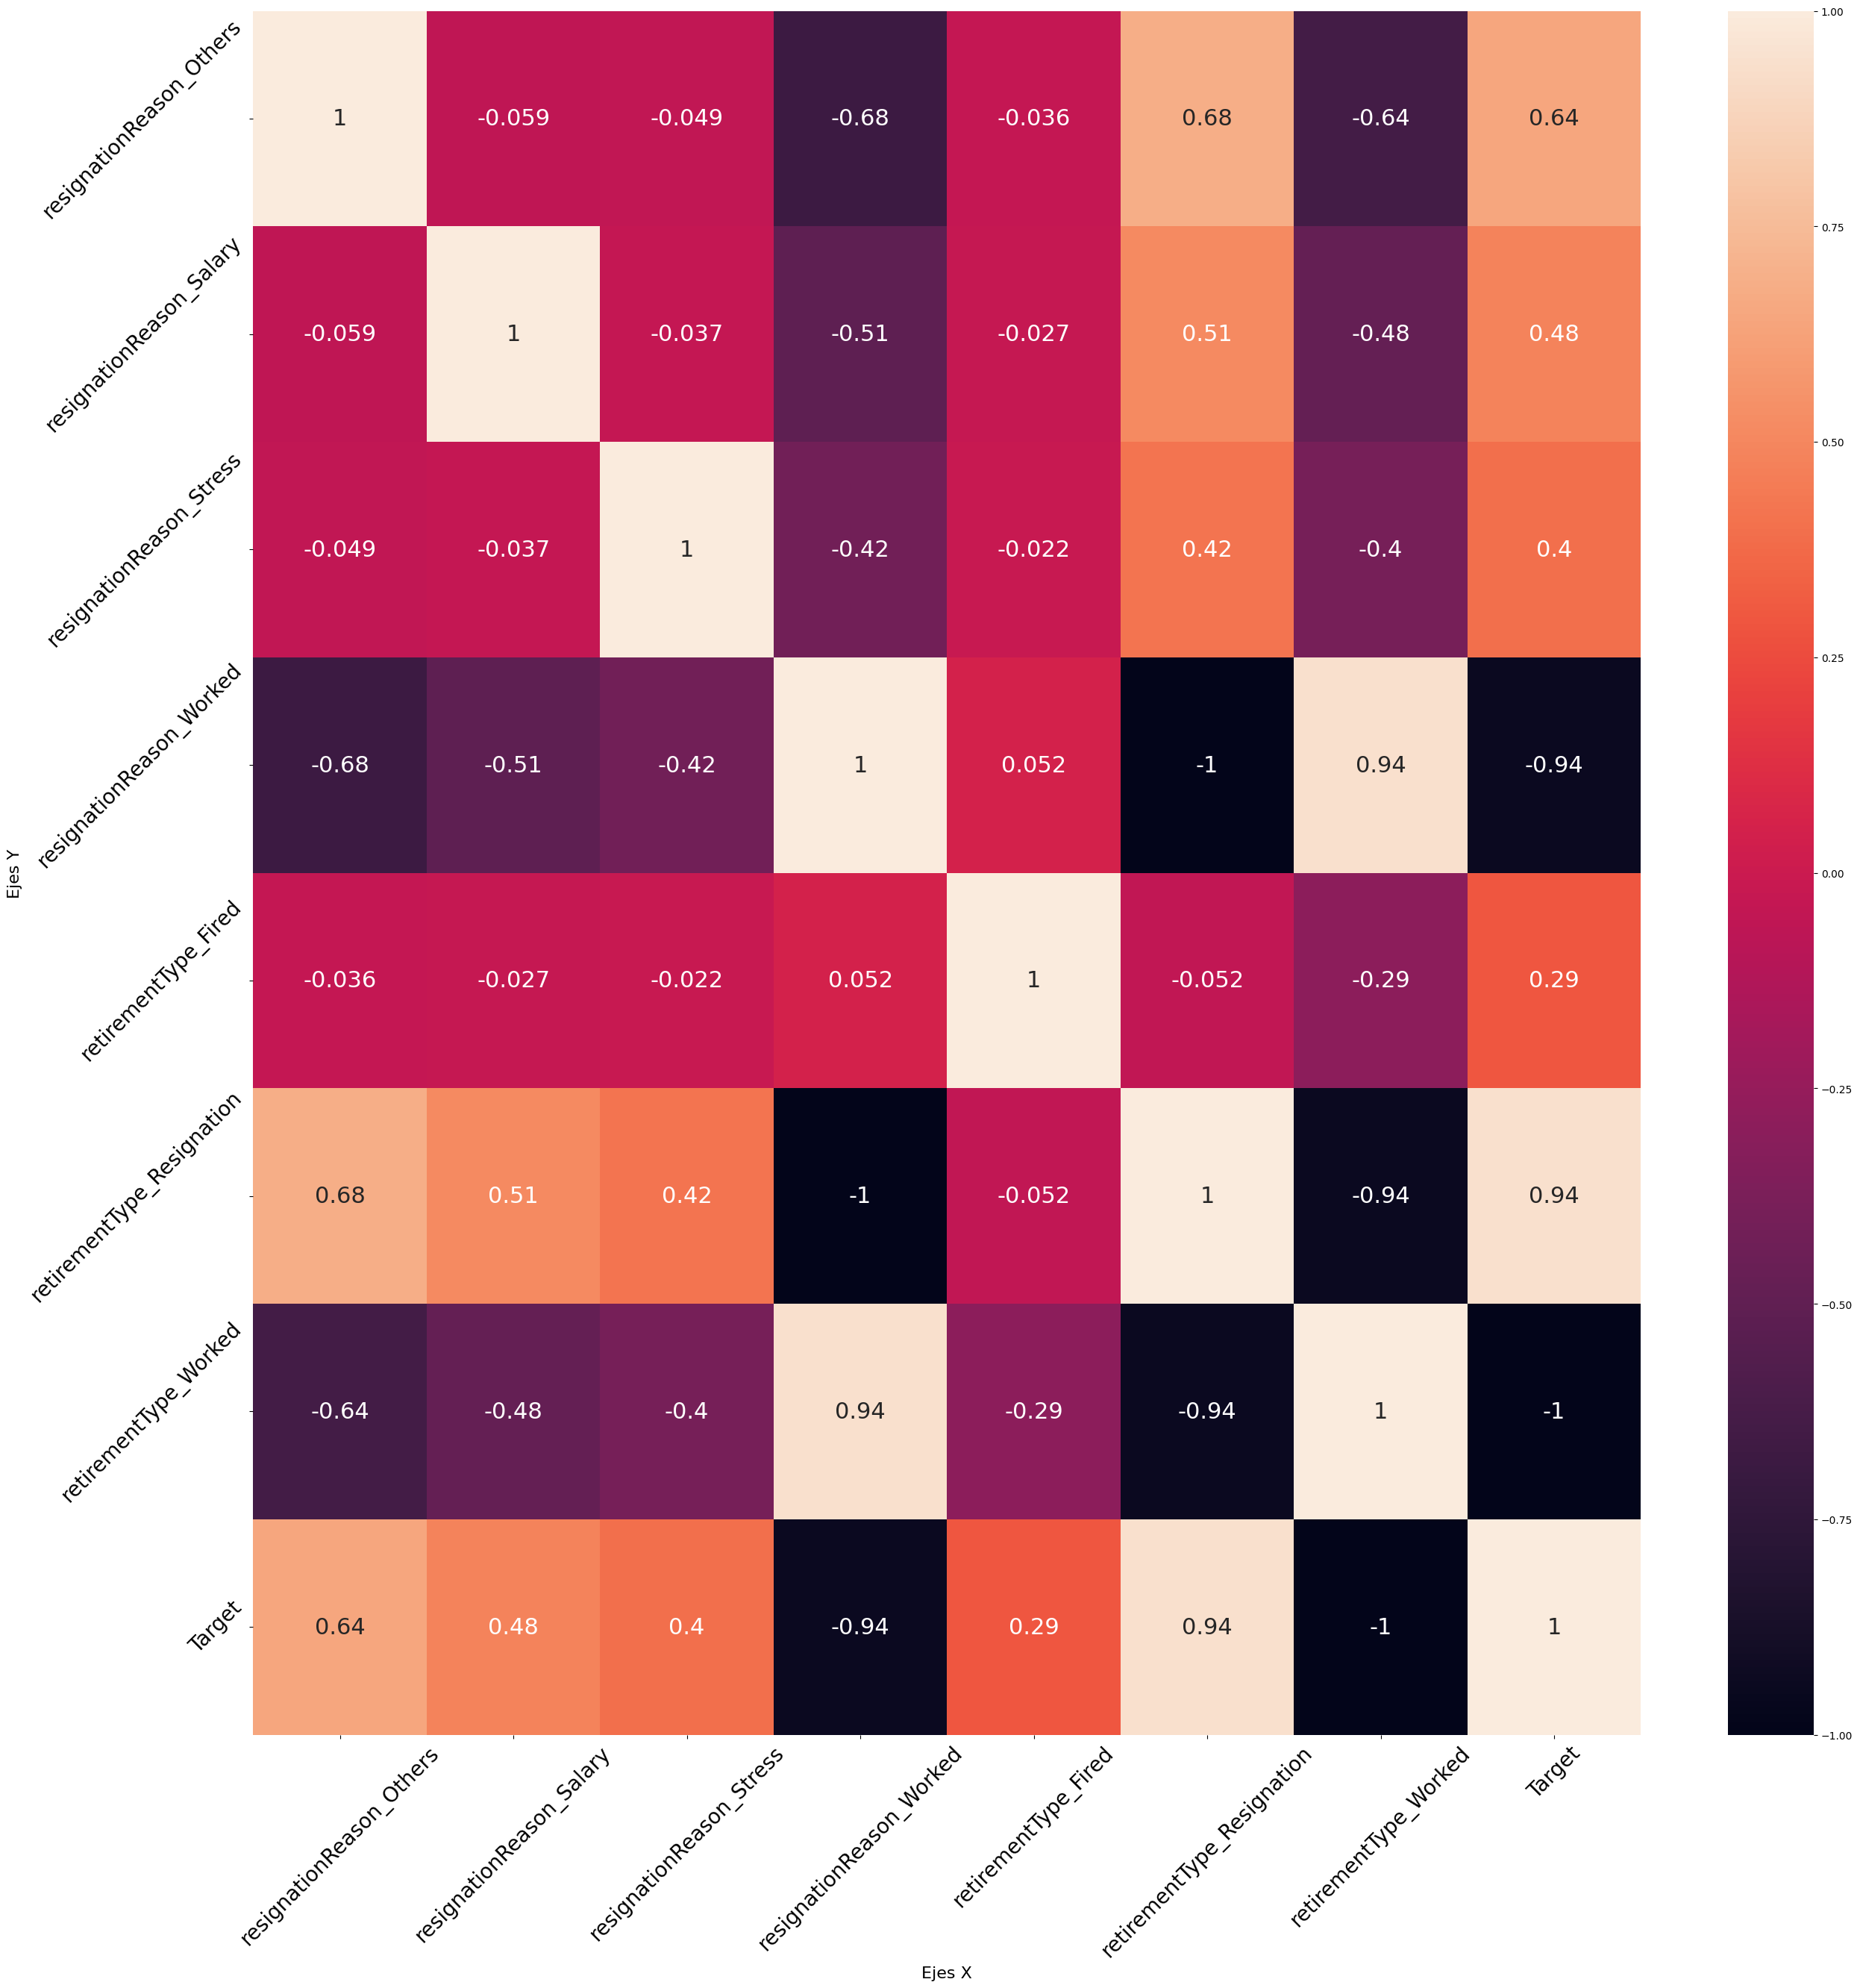

In [30]:
# Para interpretar mejor los resultados de la matriz de correlación, se decide dividir la matriz por variables
c1 = cat.iloc[:,60:67]
c1['Target'] = y
plt.figure(figsize=(30, 30))
sns.heatmap(c1.corr(), annot=True, annot_kws={"size": 22})

# Ajustar el tamaño de las leyendas y etiquetas de ejes
plt.xticks(rotation=45, fontsize=20)
plt.yticks(rotation=45, fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Ejes X", fontsize=16)  # Ajusta el tamaño de las etiquetas X
plt.ylabel("Ejes Y", fontsize=16)  # Ajusta el tamaño de las etiquetas Y

plt.show()

#num.to_csv('num.csv', index=True)

In [31]:
num2.to_csv('va_num_m1.csv', index=True)
cat2.to_csv('va_cat_m1.csv', index=True)